## CIFAR-10

### importing the liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets,models,layers

In [2]:
(x_train, y_train), (x_test, y_test)= datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

### Visualize Single Image

[6]


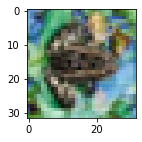

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[200])
print(y_train[200])
plt.show()

In [8]:
y_train[:4]   # it is in 2 dimentionality 

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]      # in array format

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ['Airplane', 'Cars', 'Birds', 'Cats', 'Deer', 'Dogs', 'Frogs', 'Horses', 'Ships', 'Trucks']

def sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [11]:
classes[y_train[0]]

'Frogs'

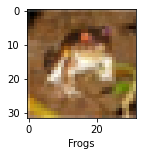

In [12]:
sample(x_train, y_train, 0)

### Visualize Multiple Images

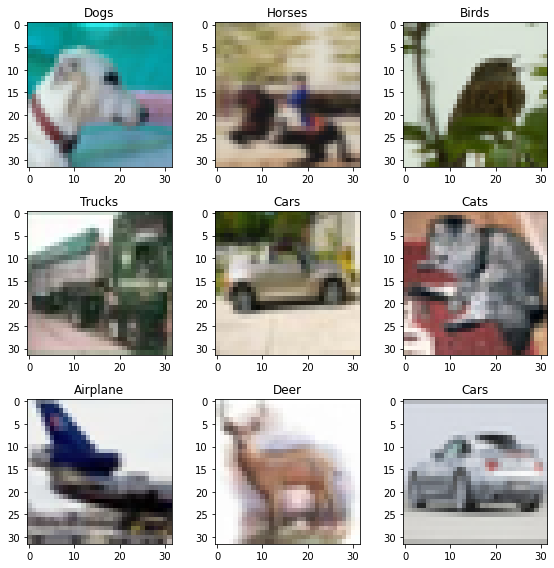

In [14]:
fig, axes = plt.subplots(3,3, figsize=(8,8))
axes = axes.ravel() # we need to flatten the 3d array to 1d array before applying imshow

for i in np.arange(0,9):
    index = np.random.randint(0, len(x_train))
    axes[i].imshow(x_train[index])
    axes[i].set_title(classes[y_train[index]])

plt.tight_layout()

In [17]:
x_train[:,1]

array([[[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 57, 182, 234],
        [ 44, 184, 250],
        [ 50, 183, 240],
        ...,
        [156, 182, 200],
        [141, 177, 206],
        [116, 149, 175]],

       [[194, 210, 239],
        [191, 207, 236],
        [190, 206, 235],
        ...,
        [173, 192, 220],
        [171, 191, 218],
        [167, 190, 216]],

       [[222, 221, 229],
        [239, 239, 249],
        [233, 234, 246],
        ...,
        [223, 223, 236],
        [227, 228, 238],
        [210, 211, 220]]

### Normalizing the training data

In [20]:
x_train = x_train / 255
x_test = x_test / 255

In [21]:
x_train[:1]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

## Build simple artificial neural network for image classification

In [25]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=10, activation='sigmoid')
])

In [26]:
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
ann.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9369 - accuracy: 0.3017
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7589 - accuracy: 0.3737
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6739 - accuracy: 0.4021
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6214 - accuracy: 0.4250
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5811 - accuracy: 0.4391
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5500 - accuracy: 0.4526
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5241 - accuracy: 0.4596
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4994 - accuracy: 0.4675
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4769 - accuracy: 0.4762
Epoch 10/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.458

## Build the Convential Neural Network for image classification

In [28]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D(2,2),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(units=64, activation='relu'), #first hidden layer with 3000 neurons
    layers.Dense(units=64, activation='relu'), #second hidden layer with 1000 neurons
    layers.Dense(units=10, activation='sigmoid')
    
])

In [31]:
cnn.compile(optimizer = 'SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
cnn.fit(x_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 45s 28ms/step - loss: 2.0701 - accuracy: 0.2444
Epoch 2/50
1563/1563 [==============================] - 46s 30ms/step - loss: 1.6781 - accuracy: 0.3968
Epoch 3/50
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4734 - accuracy: 0.4689
Epoch 4/50
1563/1563 [==============================] - 48s 30ms/step - loss: 1.3645 - accuracy: 0.5107
Epoch 5/50
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2844 - accuracy: 0.5433
Epoch 6/50
1563/1563 [==============================] - 46s 30ms/step - loss: 1.2147 - accuracy: 0.5709
Epoch 7/50
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1550 - accuracy: 0.5913
Epoch 8/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1052 - accuracy: 0.6127
Epoch 9/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0666 - accuracy: 0.6256
Epoch 10/50
1563/1563 [==============================] - 44s 28m

In [33]:
y_pred_cnn = cnn.predict(x_test)

In [34]:
y_pred_cnn[:5]

array([[6.28286600e-03, 1.11267865e-02, 1.01282090e-01, 9.99829292e-01,
        5.57588100e-01, 9.98219252e-01, 9.94752765e-01, 5.39839268e-04,
        2.52022207e-01, 2.66435742e-03],
       [9.92870152e-01, 9.99998927e-01, 4.25206721e-02, 1.25408769e-02,
        2.18336672e-01, 3.30862403e-03, 1.02285147e-02, 1.07445598e-01,
        9.99988198e-01, 7.89668739e-01],
       [9.94846940e-01, 9.34141338e-01, 1.06045574e-01, 8.95472169e-02,
        4.05262440e-01, 1.80939138e-01, 4.56586480e-03, 6.42987370e-01,
        9.97195244e-01, 9.55049515e-01],
       [9.99688864e-01, 3.07446420e-02, 9.96991515e-01, 7.66912580e-01,
        9.64283705e-01, 6.10763729e-02, 9.89909053e-01, 8.00323486e-03,
        8.30265999e-01, 7.71817565e-03],
       [3.65524238e-06, 2.46720016e-02, 9.06359196e-01, 9.99579251e-01,
        9.99984860e-01, 8.83923650e-01, 9.99999642e-01, 4.28557396e-04,
        4.97283638e-02, 1.56905367e-06]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred_cnn] #argmax() returns the index of highest value.
y_classes[:10] #predicted values

[3, 1, 8, 0, 6, 6, 1, 6, 3, 1]

In [36]:
y_test[:10] #actual values

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)